10-11

In [12]:
import jieba
import jieba.analyse as analyse
lines ="周兀哲老师是 Python 技术讲师"
print('default idf'+'-' * 90)
keywords=analyse.extract_tags(lines, topK=10, withWeight=True, allowPOS=())
for item in keywords:
    print("%s = %f "% (item [0], item[1]))

print ('set_idf_path '+'-' * 90)
jieba.analyse.set_idf_path("./data/idf.txt")
keywords=analyse.extract_tags(lines, topK=10, withWeight=True, allowPOS=())
#print ("topK = TF/ IDE, TF = °d"% len (keywords) )
for item in keywords:
    #print ("*s =% f "% (itemLOJ, item 1]))
    print ("%s TF=%f, IDF=%f topK=%f"%(item[0], item[1], len(keywords) * item[1], item [1] * len (keywords) * item[1]))

default idf------------------------------------------------------------------------------------------
周兀哲 = 2.390954 
Python = 2.390954 
讲师 = 1.727597 
老师 = 1.274684 
技术 = 0.943891 
set_idf_path ------------------------------------------------------------------------------------------
周兀哲 TF=1.800000, IDF=9.000000 topK=16.200000
老师 TF=1.800000, IDF=9.000000 topK=16.200000
Python TF=1.800000, IDF=9.000000 topK=16.200000
技术 TF=1.800000, IDF=9.000000 topK=16.200000
讲师 TF=1.800000, IDF=9.000000 topK=16.200000


10-13

In [2]:
import jieba

txt = open("./data/santi.txt", encoding="utf-8").read()
words = jieba.lcut(txt)
counts = {}
for word in words:
    counts[word] = counts.get(word, 0) + 1
items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)
for i in range(30):
    word, count = items[i]
    print(" {0: <10} {1:>5}".format(word, count))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/ly/1nz92nfj1jq23yd3gk5cxch00000gn/T/jieba.cache
Loading model cost 0.282 seconds.
Prefix dict has been built successfully.


 ，          46152
 的          36181
 。          22481
 
          21749
 　          21675
            11192
 了          10156
 “           8819
 ”           8473
 在           8385
 是           7010
 他           4215
 中           3631
 我           3357
 和           3205
 一个          3018
 都           2955
 上           2793
 这           2760
 她           2754
 说           2752
 你           2705
 ？           2700
 也           2667
 ：           2664
 但           2598
 有           2552
 着           2285
 就           2240
 不           2237


10-15

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba

text = "今天天气真好,我要去西安大雁塔玩,玩完之后,游览兵马俑"
# 进行jieba分间，精确模式
text_list = jieba.cut(text, cut_all=False)
text_list = ",".join(text_list)
context = []
context.append(text_list)
print(context)

con_vec = rec = CountVectorizer(min_df=1, stop_words=["之后", "玩完"])
X = con_vec.fit_transform(context)
feature__name = con_vec.get_feature_names_out()
print(feature__name)
print(X.toarray())

['今天天气,真,好,,,我要,去,西安,大雁塔,玩,,,玩完,之后,,,游览,兵马俑']
['今天天气' '兵马俑' '大雁塔' '我要' '游览' '西安']
[[1 1 1 1 1 1]]


10-18

In [ ]:
from pyhanlp import *
content = (
    "程序员(英文 Programmer) 是从事程序开发、维护的专业人员。"
    "一般将程序员分为程序设计人员和程序编码人员，"
    "但两者的界限并不非常清楚,特别是在中国。"
    "软件从业人员分为初级程序员、高级程序员、系统"
    "分析员和项目经理四大类。")
TextRankKeyword = JClass ("com.hankcs.hanlp.summary.TextRankKeyword")
keyword_list = HanLP.extractKeyword (content, 5)
print(keyword_list)
#print (help (Han[P))

10-20

In [ ]:
from pyhanlp import *
content="铁甲网是中国最大的工程机械交易平台"
print(HanLP.segment(content))
CustomDictionary.add( "铁甲网")
CustomDictionary.insert("工程机械","nz 1024")
CustomDictionary.add("交易平合","nz 1024 n 1")
print(HanLP.segment(content))

11-2

Test Accuracy:0.97


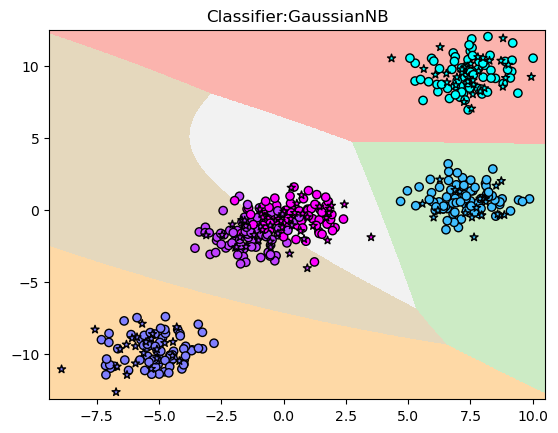

In [29]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X,y = make_blobs(n_samples=500, centers=5, random_state=8)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print("Test Accuracy:{:.2f}".format(gnb.score(X_test,y_test)))
x_min,x_max = X[:,0].min()-0.5,X[:,0].max()+0.5
y_min,y_max = X[:,1].min()-0.5,X[:,1].max()+0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z = gnb.predict(np.c_[xx.ravel(),yy.ravel()])
plt.pcolormesh(xx,yy,z.reshape(xx.shape),cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolors='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:GaussianNB")
plt.show()

# Requirements
# 1. Import packages: numpy, pandas, matplotlib, seaborn, sklearn
# 2. Load data: load the data from the folder 'data'
# Basic process
# 1. Data preprocessing: data cleaning, data integration, data reduction, data transformation
# data cleaning: missing value processing, outlier processing
# data integration: data merging, data aggregation
# data reduction: dimensionality reduction, data compression
# 2. Data visualization: draw the data distribution, correlation analysis, etc.
# Learning and Thinking
# 1. What is the purpose of data preprocessing?
# Ans: The purpose of data preprocessing is to make the data more suitable for data mining.
# 2. What are the main contents of data preprocessing?
# Ans: The main contents of data preprocessing are data cleaning, data integration, data reduction, data transformation.


11-4

模型得分: 0.544


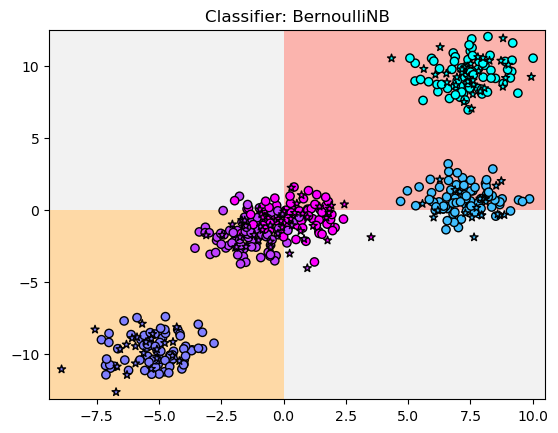

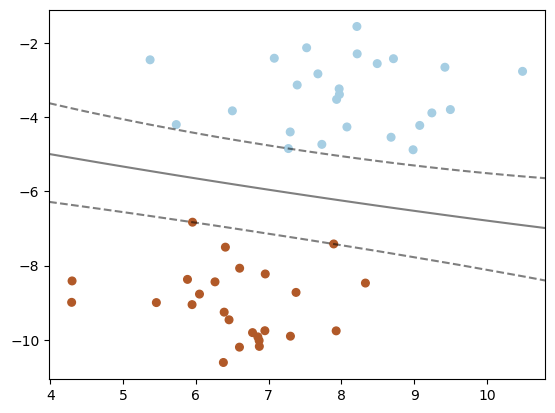

In [1]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=500, centers=5, random_state=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
nb = BernoulliNB()
nb.fit(X_train, y_train)
print("模型得分: {:.3f}".format(nb.score(X_test, y_test)))
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

z = nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool, edgecolor="k")
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool, marker="*", edgecolor="k"
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier: BernoulliNB")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 先创建 50 个数据点，让它们分为两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)
# 创建一个 RBE 内核的支持向量机模型
clf_rbf = svm.SVC(kernel="rbf", C=1000)
clf_rbf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# 建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)
# 把分类的决定边界画出来
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
ax.scatter(
    clf_rbf.support_vectors_[:, 0],
    clf_rbf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
)
plt.show()

11-5

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB  # 多项式朴素贝叶斯模型
from sklearn.metrics import classification_report

# 步骤 1.数据获取
news = fetch_20newsgroups(subset="all")
print("输出数据的条数:", len(news.data))  # 输出数据的条数:18846
# 步骤 2.数据预处理
# 分割训练集和测试集，随机采样 25%的数据样本作为测试集
X_train, X_test, y_train, y_test = train_test_split(
    news.data, news.target, test_size=0.25, random_state=33
)
# 文本特征向量化
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
# 步骤 3.使用多项式朴素贝叶斯进行训练
model = MultinomialNB()
model.fit(X_train, y_train)  # 利用训练数据对模型参数进行估计
y_predict = model.predict(X_test)  # 对参数进行预测
# 步骤 4.获取结果报告
print("准确率:", model.score(X_test, y_test))
print(classification_report(y_test, y_predict, target_names=news.target_names))

输出数据的条数: 18846
准确率: 0.8397707979626485
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       201
           comp.graphics       0.59      0.86      0.70       250
 comp.os.ms-windows.misc       0.89      0.10      0.17       248
comp.sys.ibm.pc.hardware       0.60      0.88      0.72       240
   comp.sys.mac.hardware       0.93      0.78      0.85       242
          comp.windows.x       0.82      0.84      0.83       263
            misc.forsale       0.91      0.70      0.79       257
               rec.autos       0.89      0.89      0.89       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.98      0.91      0.95       251
        rec.sport.hockey       0.93      0.99      0.96       233
               sci.crypt       0.86      0.98      0.91       238
         sci.electronics       0.85      0.88      0.86       249
                 sci.med       0.92 

11-8

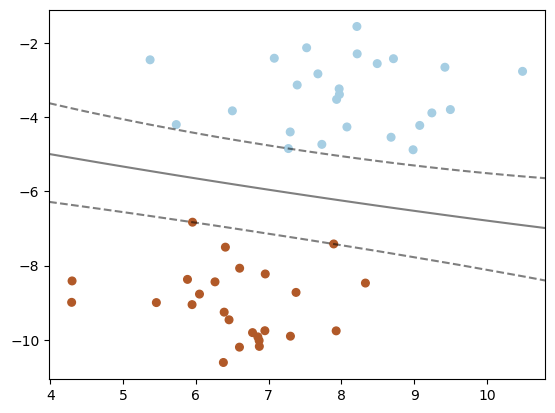

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 先创建 50 个数据点，让它们分为两类
X,y = make_blobs(n_samples=50,centers=2,random_state=6)

# 创建一个 RBE 内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf',C=1000)
clf_rbf.fit(X,y)
# 把数据点画出来
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)

# 建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(),YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
ax.scatter(clf_rbf.support_vectors_[:,0],clf_rbf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none')
plt.show()



Assigment#3

In [28]:
# coding=UTF-8
from numpy import *
import matplotlib.pyplot as plt
import time
import math
import re


def loadTrainDataSet():
    fileIn = open("./data/testSet.txt")
    postingList = []
    classVec = []
    i = 0
    for line in fileIn.readlines():
        lineArr = line.strip().split()
        temp = []
        for i in range(len(lineArr)):
            if i == 0:
                classVec.append(int(lineArr[i]))
            else:
                temp.append(lineArr[i])
        postingList.append(temp)
        i = i + 1
    return postingList, classVec


# 创建词汇表
def createVocabList(dataSet):
    vocabSet = set([])
    for document in dataSet:
        vocabSet = vocabSet | set(document)
    return list(vocabSet)


# 每一个样本的特征向量
def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else:
            pass
            # print(m1"号s\，不存在于词典中"gword)
    return returnVec


# 生成训练矩阵
def createTrainMatrix(vocabList, postingList):
    trainMatrix = []
    for i in range(len(postingList)):
        curVec = setOfWords2Vec(vocabList, postingList[i])
        trainMatrix.append(curVec)
    return trainMatrix
    # 定义list型的集合
    # 每一个训练样本的特征向量
    # 生成训练矩阵


def trainNB0(trainMatrix, trainCategory):
    # 样本数量
    numTrainDocs = len(trainMatrix)
    # 样本特征数
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory) / float(numTrainDocs)  # p (y= 1)
    # 分子赋值为 1，分母赋值为 2(拉普拉斯平滑)
    p0Num = ones(numWords)
    p1Num = ones(numWords)
    p0Denom = p1Denom = 2.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = p1Num / p1Denom  # 概率向量
    p0Vect = p0Num / p0Denom  # 概率向量
    # 取对数，之后的乘法就可以改为加法，防止数值下溢损失精度
    p1Vect = log(p1Vect)
    p0Vect = log(p0Vect)
    return p0Vect, p1Vect, pAbusive


def classifyNB(vocabList, testEntry, p0Vec, p1Vec, pClass1):  # 朴素贝叶斯分类
    # 先将输入文本处理成特征向量
    regEx = re.compile("\\W * ")
    testArr = regEx.split(testEntry)
    # 正则匹配分隔，以字母数字的任何字符为分隔符
    testVec = array(setOfWords2Vec(vocabList, testArr))

    # 此处的乘法并非矩阵乘法，而是矩阵相同位置的两个数分別相乘
    # 矩阵乘法应当 dot(A，B）或者 A.dot(B)
    p1 = sum(testVec * p1Vec) + log(pClass1)
    p0 = sum(testVec * p0Vec) + log(1.0 - pClass1)
    # 比较大小
    if p1 > p0:
        return 1
    else:
        return 0


# 测试方法
def testingNB():
    postingList, classVec = loadTrainDataSet()
    vocabList = createVocabList(postingList)
    trainMatrix = createTrainMatrix(vocabList, postingList)

    p0V, p1V, pAb = trainNB0(trainMatrix, classVec)
    # 输人测试文本，单词必须用空格分开
    testEntry = input()
    print("测试文本为" + testEntry)
    if classifyNB(vocabList, testEntry, p0V, p1V, pAb):
        print("--------侮辱性邮件--------")
    else:
        print("--------正常邮件---------")


testingNB()

测试文本为hello
--------正常邮件---------
